In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_titanic=pd.read_csv('TitanicClean.csv')
df_titanic.drop('Unnamed: 0',axis=1,inplace=True)
df_titanic

,Age,Cabin,Embarked,Fare,Fsize,PassengerId,Pclass,Sex,Died,Survived
0,22,M,S,7.2500,2,1,3,male,Dead,0
1,38,C,C,71.2833,2,2,1,female,Alive,1
2,26,M,S,7.9250,1,3,3,female,Alive,1
3,35,C,S,53.1000,2,4,1,female,Alive,1
4,35,M,S,8.0500,1,5,3,male,Dead,0
...,...,...,...,...,...,...,...,...,...,...
1304,29,M,S,8.0500,1,1305,3,male,Dead,0
1305,39,C,C,108.9000,1,1306,1,female,Alive,1
1306,38,M,S,7.2500,1,1307,3,male,Dead,0
1307,29,M,S,8.0500,1,1308,3,male,Dead,0


In [ ]:
d_survived=df_titanic['Died']
d_survived=pd.DataFrame(d_survived.value_counts().reset_index())
d_survived.rename(columns={'index':'Survival'},inplace=True)

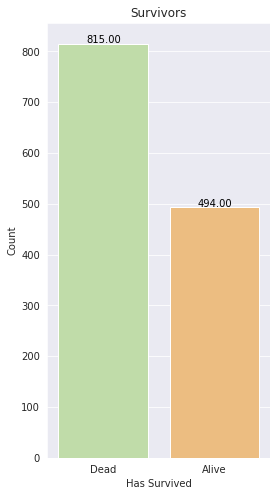

In [ ]:
plt.figure(figsize=(4,8))
sns.barplot(data=d_survived,x='Survival',y='Died',palette='Spectral_r')
sns.set_style('darkgrid')
plt.title("Survivors")
plt.ylabel('Count')
plt.xlabel('Has Survived')
for index,value in enumerate(d_survived['Died']):
  plt.annotate('%.2f'%value, xy=(index-0.15,value+1), color='Black')
plt.show()

In [ ]:
d_ageS=df_titanic.groupby('Age')['Survived'].mean().reset_index()
d_ageS=pd.DataFrame(d_ageS)
d_ageS.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_ageS['Survival Rate']=(d_ageS['Survival Rate']*100).astype(int)
d_ageS

,Age,Survival Rate
0,0,75
1,1,80
2,2,33
3,3,85
4,4,70
...,...,...
68,70,0
69,71,0
70,74,0
71,76,100


In [ ]:
group=['Child(0-18 Years)','Youth(19-36 Years)','MiddleAge(37-54 Years)','Old(55-)']

In [ ]:
d_ageS.describe(percentiles=[0,1/5,1/2,9/10,1])

,Age,Survival Rate
count,73.000000,73.000000
mean,36.287671,39.931507
std,21.723310,24.497352
min,0.000000,0.000000
0%,0.000000,0.000000
20%,14.400000,23.200000
50%,36.000000,40.000000
90%,64.800000,75.000000
100%,80.000000,100.000000
max,80.000000,100.000000


In [ ]:
d_ageS['Category']=pd.qcut(d_ageS['Age'],labels=group,q=[0,1/5,1/2,9/10,1])
d_ageS=pd.DataFrame(d_ageS)
d_ageS=d_ageS.reset_index(drop=True)
d_ageS.drop('Age',inplace=True,axis=1)
d_ageS=d_ageS.groupby('Category')['Survival Rate'].mean().reset_index()

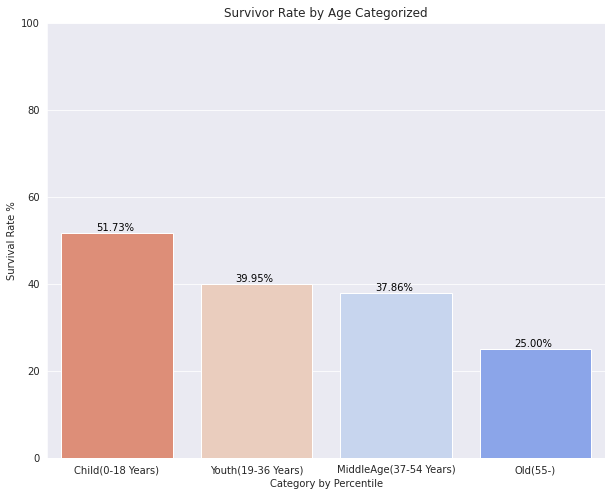

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=d_ageS,x='Category',y='Survival Rate',palette='coolwarm_r')
sns.set_style('darkgrid')
plt.title("Survivor Rate by Age Categorized")
plt.ylabel('Survival Rate %')
plt.xlabel('Category by Percentile')
plt.ylim(0,100)
for index,value in enumerate(d_ageS['Survival Rate']):
  plt.annotate('%.2f'%value+'%', xy=(index-0.15,value+0.5), color='Black')
plt.show()

In [ ]:
d_fareS=df_titanic.groupby('Fare')['Survived'].mean().reset_index()
d_fareS=pd.DataFrame(d_fareS)
d_fareS.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_fareS['Survival Rate']=d_fareS['Survival Rate']*100
d_fareS

,Fare,Survival Rate
0,0.0000,5.882353
1,3.1708,0.000000
2,4.0125,0.000000
3,5.0000,0.000000
4,6.2375,0.000000
...,...,...
277,227.5250,60.000000
278,247.5208,66.666667
279,262.3750,71.428571
280,263.0000,66.666667


In [ ]:
group=['Low(33th%)','Mid(33-50th%)','High(50-75th%)','Top End(75-100th%)']

In [ ]:
d_fareS.describe(percentiles=[0, 1/3, 3/4, 1])

,Fare,Survival Rate
count,282.000000,282.000000
mean,38.845278,42.285535
std,52.997266,38.595774
min,0.000000,0.000000
0%,0.000000,0.000000
33.3%,12.283333,0.000000
50%,20.387500,50.000000
75%,49.503150,74.107143
100%,512.329200,100.000000
max,512.329200,100.000000


In [ ]:
d_fareS['Cost_Range']=pd.qcut(d_fareS['Fare'],labels=group,q=[0,1/3,1/2,3/4,1])
d_fareS=pd.DataFrame(d_fareS)
d_fareS=d_fareS.reset_index(drop=True)
d_fareS

,Fare,Survival Rate,Cost_Range
0,0.0000,5.882353,Low(33th%)
1,3.1708,0.000000,Low(33th%)
2,4.0125,0.000000,Low(33th%)
3,5.0000,0.000000,Low(33th%)
4,6.2375,0.000000,Low(33th%)
...,...,...,...
277,227.5250,60.000000,Top End(75-100th%)
278,247.5208,66.666667,Top End(75-100th%)
279,262.3750,71.428571,Top End(75-100th%)
280,263.0000,66.666667,Top End(75-100th%)


In [ ]:
d_fareS=pd.DataFrame(d_fareS.groupby('Cost_Range')['Survival Rate'].mean().reset_index())


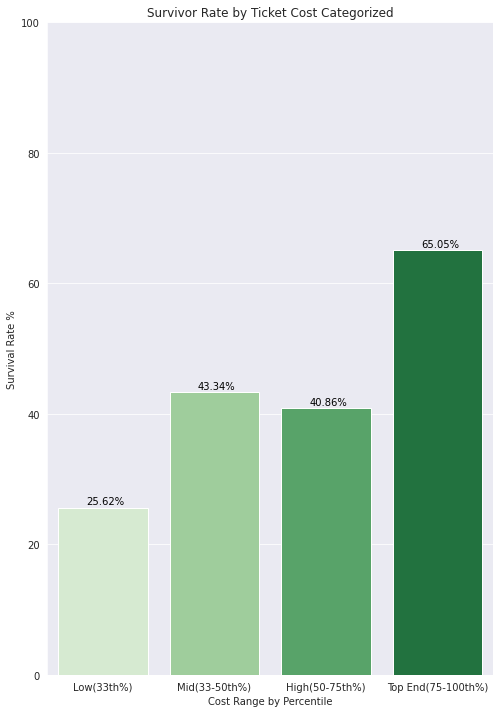

In [ ]:
plt.figure(figsize=(8,12))
sns.barplot(data=d_fareS,x='Cost_Range',y='Survival Rate',palette='Greens')
sns.set_style('darkgrid')
plt.ylabel('Survival Rate %')
plt.xlabel('Cost Range by Percentile')
plt.title("Survivor Rate by Ticket Cost Categorized")
plt.ylim(0,100)
for index, value in enumerate(d_fareS['Survival Rate']):
  plt.annotate('%.2f'%value+'%', xy=(index-0.15,value+0.5), color='Black')
plt.show()

In [ ]:
d_cabin=df_titanic.groupby('Cabin')['Survived'].mean().reset_index()
d_cabin.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_cabin['Survival Rate']=d_cabin['Survival Rate']*100

In [ ]:
d_cabin

,Cabin,Survival Rate
0,A,45.454545
1,B,67.692308
2,C,57.446809
3,D,65.217391
4,E,68.292683
5,F,52.380952
6,G,60.000000
7,M,30.966469
8,T,0.000000


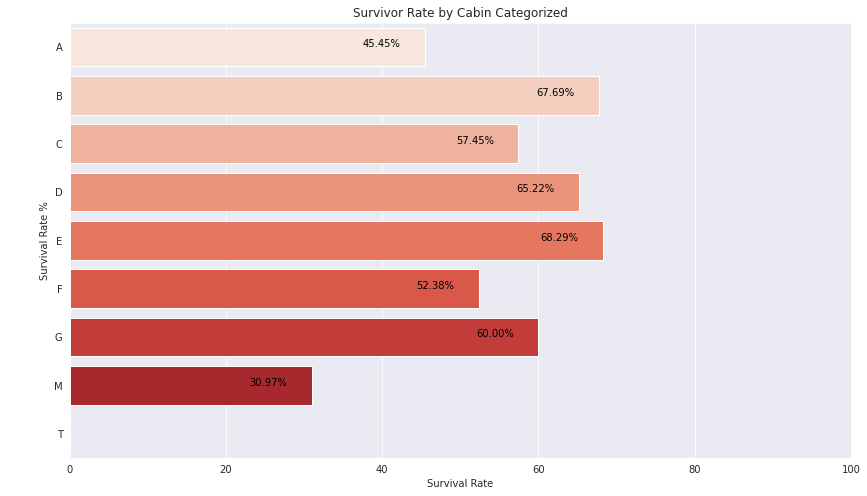

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data=d_cabin,y='Cabin',x='Survival Rate',palette='Reds')
sns.set_style('darkgrid')
plt.title("Survivor Rate by Cabin Categorized")
plt.ylabel('Survival Rate %')
plt.xlim(0,100)
for index, value in enumerate(d_cabin['Survival Rate']):
  plt.annotate('%.2f'%value+'%', xy=(value - 8, index - 0), color='Black')
plt.show()

In [ ]:
d_socioeco=df_titanic.groupby('Pclass')['Survived'].mean().reset_index()
d_socioeco.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_socioeco['Survival Rate']=d_socioeco['Survival Rate']*100

In [ ]:
d_socioeco

,Pclass,Survival Rate
0,1,57.585139
1,2,42.238267
2,3,26.939351


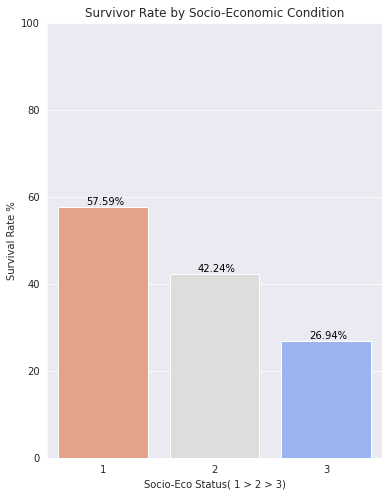

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(data=d_socioeco,x='Pclass',y='Survival Rate',palette='coolwarm_r')
sns.set_style('darkgrid')
plt.title("Survivor Rate by Socio-Economic Condition")
plt.ylabel('Survival Rate %')
plt.xlabel('Socio-Eco Status( 1 > 2 > 3)')
plt.ylim(0,100)
for index, value in enumerate(d_socioeco['Survival Rate']):
  plt.annotate('%.2f'%value+'%', xy=(index-0.15,value+0.5), color='Black')
plt.show()

In [ ]:
df_titanic

,Age,Cabin,Embarked,Fare,Fsize,PassengerId,Pclass,Sex,Died,Survived
0,22,M,S,7.2500,2,1,3,male,Dead,0
1,38,C,C,71.2833,2,2,1,female,Alive,1
2,26,M,S,7.9250,1,3,3,female,Alive,1
3,35,C,S,53.1000,2,4,1,female,Alive,1
4,35,M,S,8.0500,1,5,3,male,Dead,0
...,...,...,...,...,...,...,...,...,...,...
1304,29,M,S,8.0500,1,1305,3,male,Dead,0
1305,39,C,C,108.9000,1,1306,1,female,Alive,1
1306,38,M,S,7.2500,1,1307,3,male,Dead,0
1307,29,M,S,8.0500,1,1308,3,male,Dead,0


In [ ]:
d_family=df_titanic.groupby('Fsize')['Survived'].mean().reset_index()
d_family.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_family['Survival Rate']=d_family['Survival Rate']*100

In [ ]:
d_family

,Fsize,Survival Rate
0,1,29.240506
1,2,53.191489
2,3,55.974843
3,4,72.093023
4,5,22.727273
5,6,20.000000
6,7,31.250000
7,8,12.500000
8,11,18.181818


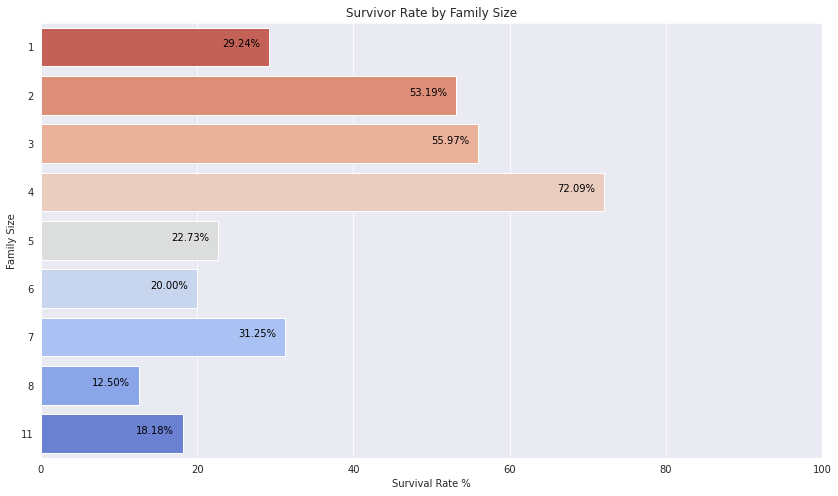

In [ ]:
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
sns.barplot(data=d_family,y='Fsize',x='Survival Rate',palette='coolwarm_r',orient='h')
plt.title("Survivor Rate by Family Size")
plt.xlabel('Survival Rate %')
plt.ylabel('Family Size')
plt.xlim(0,100)
for index, value in enumerate(d_family['Survival Rate']):
  plt.annotate('%.2f'%value+'%', xy=(value - 6, index - 0), color='Black')
plt.show()

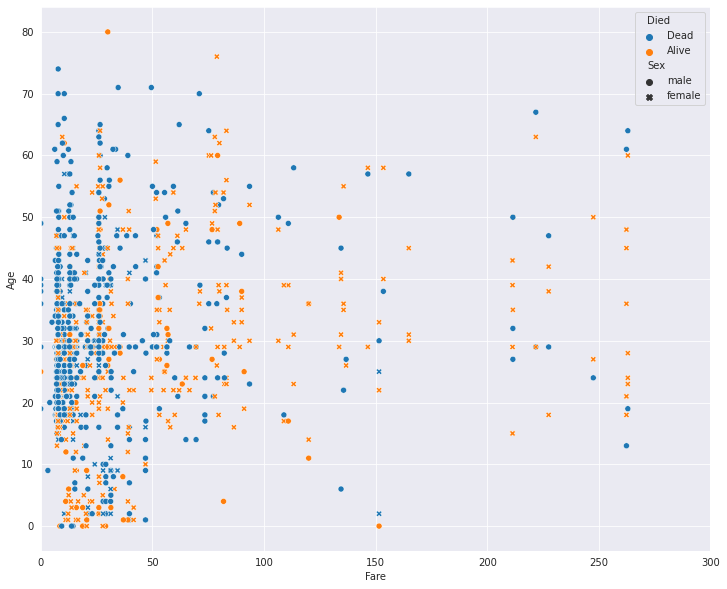

In [ ]:
plt.figure(figsize=(12,10))
plt.xlim(0,300)
sns.scatterplot(data=df_titanic,x='Fare',y='Age',hue='Died',style='Sex')

In [ ]:
df_titanic

,Age,Cabin,Embarked,Fare,Fsize,PassengerId,Pclass,Sex,Died,Survived
0,22,M,S,7.2500,2,1,3,male,Dead,0
1,38,C,C,71.2833,2,2,1,female,Alive,1
2,26,M,S,7.9250,1,3,3,female,Alive,1
3,35,C,S,53.1000,2,4,1,female,Alive,1
4,35,M,S,8.0500,1,5,3,male,Dead,0
...,...,...,...,...,...,...,...,...,...,...
1304,29,M,S,8.0500,1,1305,3,male,Dead,0
1305,39,C,C,108.9000,1,1306,1,female,Alive,1
1306,38,M,S,7.2500,1,1307,3,male,Dead,0
1307,29,M,S,8.0500,1,1308,3,male,Dead,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
df_tit2=df_titanic

In [ ]:
non_num_features=df_titanic[['Cabin','Embarked','Fsize','Pclass','Sex']]

In [ ]:
lb=LabelEncoder()

In [ ]:
for f in non_num_features:
  df_tit2[f]=lb.fit_transform(df_tit2[f])


In [ ]:
df_tit2.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Fsize', 'PassengerId', 'Pclass',
       'Sex', 'Died', 'Survived'],
      dtype='object')

In [ ]:
df_tit2

,Age,Cabin,Embarked,Fare,Fsize,PassengerId,Pclass,Sex,Died,Survived
0,22,7,2,7.2500,1,1,2,1,Dead,0
1,38,2,0,71.2833,1,2,0,0,Alive,1
2,26,7,2,7.9250,0,3,2,0,Alive,1
3,35,2,2,53.1000,1,4,0,0,Alive,1
4,35,7,2,8.0500,0,5,2,1,Dead,0
...,...,...,...,...,...,...,...,...,...,...
1304,29,7,2,8.0500,0,1305,2,1,Dead,0
1305,39,2,0,108.9000,0,1306,0,0,Alive,1
1306,38,7,2,7.2500,0,1307,2,1,Dead,0
1307,29,7,2,8.0500,0,1308,2,1,Dead,0


In [ ]:
df_tit2.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Fsize', 'PassengerId', 'Pclass',
       'Sex', 'Died', 'Survived'],
      dtype='object')

In [ ]:
x = preprocessing.StandardScaler().fit_transform(df_tit2[['Age','Cabin','Embarked','Fare','Fsize','Pclass','Sex']])
y=df_tit2['Survived'].values
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)

In [ ]:
from sklearn import metrics

In [ ]:
Ks = 15
mean_acc = np.zeros((Ks-1))
mean_train = np.zeros((Ks-1))
mean_f1 = np.zeros((Ks-1))
mean_f1train = np.zeros((Ks-1))

for n in range(1,Ks):
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    mean_f1[n-1] = metrics.f1_score(y_test, yhat)
    mean_train[n-1] = metrics.accuracy_score(y_train, neigh.predict(x_train))
    mean_f1train[n-1] = metrics.f1_score(y_train, neigh.predict(x_train))
    

print(mean_acc)
print(mean_train)
print(mean_f1)
print(mean_f1train)

[0.79643766 0.80916031 0.83206107 0.82188295 0.83715013 0.8346056
 0.82951654 0.84478372 0.84223919 0.84987277 0.84732824 0.84732824
 0.84223919 0.83969466]
[0.97707424 0.89628821 0.8941048  0.89082969 0.8919214  0.88209607
 0.88100437 0.88100437 0.87991266 0.87445415 0.87663755 0.87336245
 0.87008734 0.87227074]
[0.72789116 0.70119522 0.76923077 0.74074074 0.77777778 0.76702509
 0.76655052 0.78136201 0.7862069  0.79151943 0.79452055 0.79166667
 0.78911565 0.78498294]
[0.96925329 0.84087102 0.85457271 0.84227129 0.85067873 0.83125
 0.83559578 0.83153014 0.83383686 0.82170543 0.82852807 0.82317073
 0.82105263 0.82352941]


In [ ]:
m_df=pd.DataFrame(mean_acc)
m_df.reset_index(inplace=True)
m_df['index']=m_df['index']+1

In [ ]:
mt_df=pd.DataFrame(mean_train)
mt_df.reset_index(inplace=True)
mt_df['index']=m_df['index']

In [ ]:
mf_df=pd.DataFrame(mean_f1)
mf_df.reset_index(inplace=True)
mf_df['index']=m_df['index']

In [ ]:
mtf_df=pd.DataFrame(mean_f1train)
mtf_df.reset_index(inplace=True)
mtf_df['index']=m_df['index']

In [ ]:
m_df.rename(columns={0:'Accuracy','index':'K-Vals'},inplace=True)
mt_df.rename(columns={0:'Accuracy train','index':'K-Vals'},inplace=True)
mf_df.rename(columns={0:'F1 score','index':'K-Vals'},inplace=True)
mtf_df.rename(columns={0:'F1 train','index':'K-Vals'},inplace=True)

In [ ]:
m_df

,K-Vals,Accuracy
0,1,0.796438
1,2,0.809160
2,3,0.832061
3,4,0.821883
4,5,0.837150
5,6,0.834606
6,7,0.829517
7,8,0.844784
8,9,0.842239
9,10,0.849873


In [ ]:
mt_df

,K-Vals,Accuracy train
0,1,0.977074
1,2,0.896288
2,3,0.894105
3,4,0.890830
4,5,0.891921
5,6,0.882096
6,7,0.881004
7,8,0.881004
8,9,0.879913
9,10,0.874454


In [ ]:
model_acc=m_df
model_acc['Accuracy train']=mt_df['Accuracy train']

In [ ]:
model_acc['F1 score']=mf_df['F1 score']
model_acc['F1 train']=mtf_df['F1 train']

In [ ]:
model_acc

,K-Vals,Accuracy,Accuracy train,F1 score,F1 train
0,1,0.796438,0.977074,0.727891,0.969253
1,2,0.809160,0.896288,0.701195,0.840871
2,3,0.832061,0.894105,0.769231,0.854573
3,4,0.821883,0.890830,0.740741,0.842271
4,5,0.837150,0.891921,0.777778,0.850679
5,6,0.834606,0.882096,0.767025,0.831250
6,7,0.829517,0.881004,0.766551,0.835596
7,8,0.844784,0.881004,0.781362,0.831530
8,9,0.842239,0.879913,0.786207,0.833837
9,10,0.849873,0.874454,0.791519,0.821705


In [ ]:
#model_acc.to_csv('Predictions.csv')

In [ ]:
df_prediction=model_acc

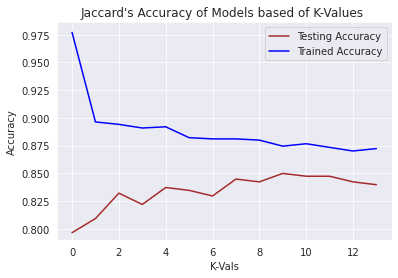

In [ ]:
sns.lineplot(y=df_prediction['Accuracy'],x=df_prediction['K-Vals']-1,color='Brown')
sns.lineplot(y=df_prediction['Accuracy train'],x=df_prediction['K-Vals']-1,color='Blue')
plt.legend(['Testing Accuracy','Trained Accuracy'])
plt.title("Jaccard's Accuracy of Models based of K-Values ")
plt.ylim(0.79,)
plt.show()

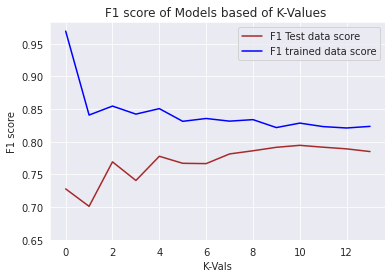

In [ ]:
sns.lineplot(y=df_prediction['F1 score'],x=df_prediction['K-Vals']-1,color='Brown')
sns.lineplot(y=df_prediction['F1 train'],x=df_prediction['K-Vals']-1,color='Blue')
plt.legend(['F1 Test data score','F1 trained data score'])
plt.title("F1 score of Models based of K-Values ")
plt.ylim(0.65,)
plt.show()

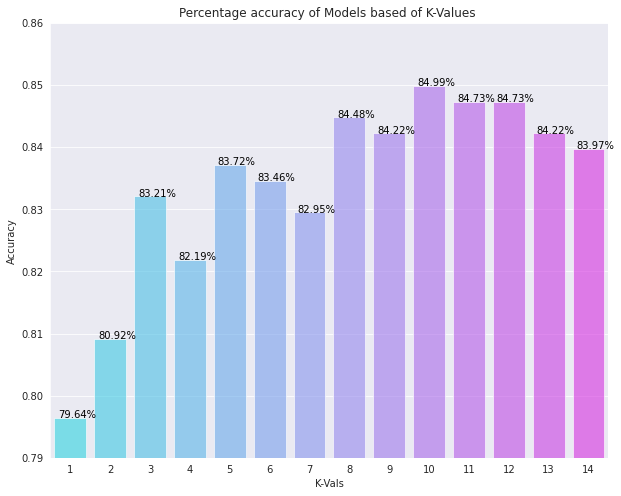

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y=m_df['Accuracy'],x=m_df['K-Vals'],palette='cool',alpha=0.6)
plt.title('Percentage accuracy of Models based of K-Values ')
plt.ylim(0.79,0.86)
for index, value in enumerate(m_df['Accuracy']):
  plt.annotate('%.2f'%(value*100)+'%', xy=(index-0.3,value), color='Black')
plt.show()

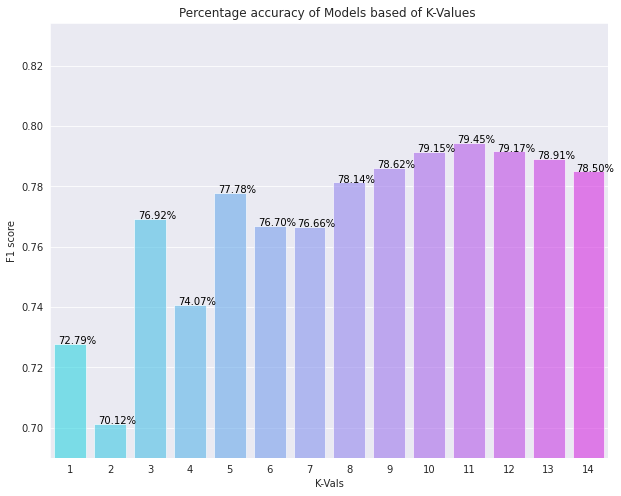

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y=df_prediction['F1 score'],x=df_prediction['K-Vals'],palette='cool',alpha=0.6)
plt.title('Percentage accuracy of Models based of K-Values ')
plt.ylim(0.69,)
for index, value in enumerate(df_prediction['F1 score']):
  plt.annotate('%.2f'%(value*100)+'%', xy=(index-0.3,value), color='Black')
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print( "The best accuracy was with", mean_train.max(), "with k=", mean_train.argmax()+1) 

The best accuracy was with 0.8498727735368957 with k= 10
The best accuracy was with 0.9770742358078602 with k= 1


In [ ]:
k = 10
finalmodel = KNeighborsClassifier(n_neighbors = k,n_jobs=4,p=2,leaf_size=1).fit(x_train,y_train)
finalmodel


KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=4, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
yhat=finalmodel.predict(x_test)

In [ ]:
metrics.accuracy_score(y_train,finalmodel.predict(x_train))

0.8733624454148472

In [ ]:
metrics.accuracy_score(y_test,yhat)

0.8498727735368957

In [ ]:
cm=metrics.confusion_matrix(y_test,yhat)

In [ ]:
cm

array([[222,  21],
       [ 38, 112]])

In [ ]:
#np.savetxt('confusionmatrix.csv',cm)

In [ ]:
class_names=['Alive','Dead']

In [ ]:
import itertools

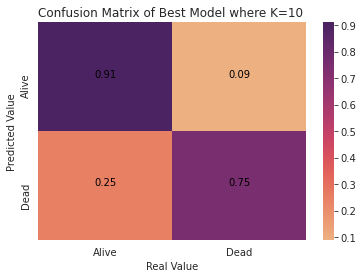

In [ ]:
plt.title("Confusion matrix")
pcm=[]
for i in range(len(cm)):
  pcm.append(np.around(cm[i]/cm[i].sum(),decimals=2))   
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j+0.5, i+0.5, pcm[i][j], horizontalalignment="center", color='Black')
sns.heatmap(pcm,cmap='flare',xticklabels=class_names,yticklabels=class_names)
plt.title('Confusion Matrix of Best Model where K=10 ')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.show()

In [ ]:
print(metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       243
           1       0.84      0.75      0.79       150

    accuracy                           0.85       393
   macro avg       0.85      0.83      0.84       393
weighted avg       0.85      0.85      0.85       393



In [ ]:
metrics.f1_score(y_test,yhat)

0.7915194346289753